## Observations and Insights

This analytical project was primarily conducted to established whether the potential treatments are effective. From the brief history given by the company the data provided is the potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

During the analysis of the various drug regimens used by the company during research it's significant to note that capomulin drug regimen is more effective when compared to the rest in terms of total tumor volume plotted on boxplot figure. Capomulin data are closely grouped together and shows a linear progression with no outliers.

Ramicane also, shows a similar effectiveness as compared to capomulin in terms of tumor to volume ratio. The other two drugs on the top of the list has a slightly higher tumor to volume ratio and infubinol had an outlier making it least effective despite its linear progression with outlier that might skew the data hence false representation.

When mouse weight was compared to the total volume used, it is worth mentioning that there is a positive correllation. The heavier the mouse weighs the more tumor volume it needs and vice versa. On overall, the analysis of the results shows a positive trend and consistency making the data in my view reliable for a potential treatment of skin cancer.

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset

# Display the data table for preview
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
total_mice = pd.unique(combined_mouse_data['Mouse ID'])
len(total_mice)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_count=len(combined_mouse_data)-len(combined_mouse_data.drop_duplicates())
duplicate_count

1

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})

duplicate_mice=combined_mouse_data.loc[combined_mouse_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data.loc[combined_mouse_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame to confirm that all the duplicates are removed
#From our combined merged data there were 249 unique with 1 duplicates thus the end results after cleaning is 248.
mice_total_clean = pd.unique(clean_df['Mouse ID'])
len(mice_total_clean)

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean
, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = clean_df.groupby('Drug Regimen')

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_regimen_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })

summary_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg_data=summary_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],})
summary_agg_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## BAr and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_data = clean_df['Drug Regimen'].value_counts()

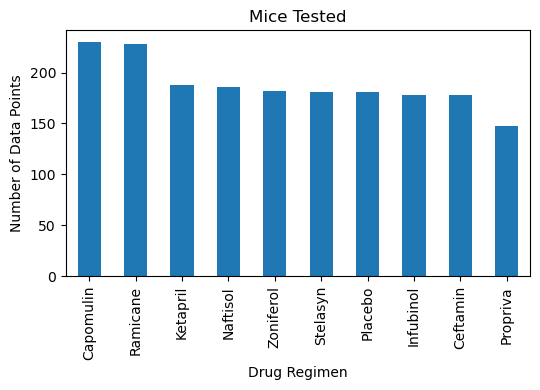

In [12]:
drug_regimen_data.plot(kind="bar",figsize=(5.5,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.tight_layout()

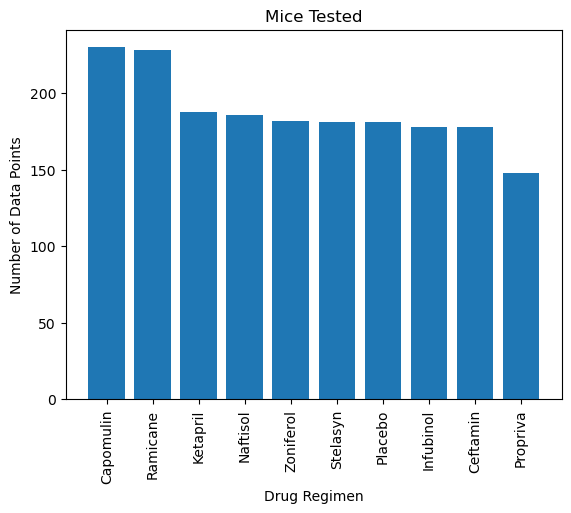

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


plt.bar(drug_regimen_data.index.values, drug_regimen_data.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.show()
plt.tight_layout()

<Axes: ylabel='Sex'>

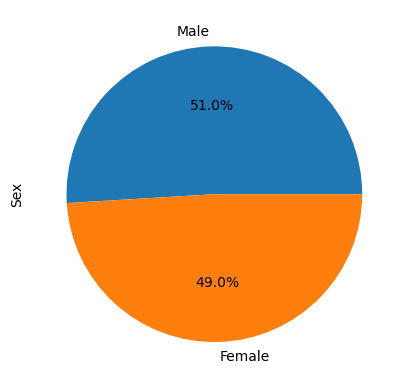

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
sex_count.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

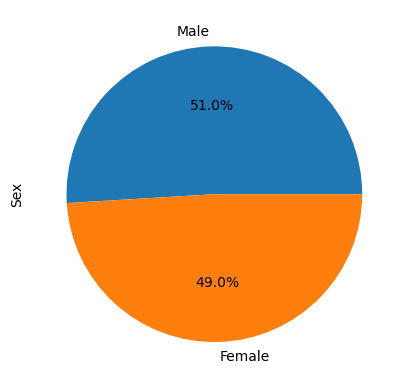

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

timepoint_max_df = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

merged_max_df= pd.merge(clean_df, timepoint_max_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
lowerq = []
upperq = []
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_reg_rows = merged_max_df.loc[merged_max_df['Drug Regimen'] == treatment]
    tumor_vol.append(drug_reg_rows)

    # Determine outliers using upper and lower bounds
    quartiles = drug_reg_rows['Tumor Volume (mm3)'].loc[drug_reg_rows['Drug Regimen'] == treatment].quantile([.25, .5, .75])
    lowerq.append(quartiles[0.25])
    upperq.append(quartiles[0.75])
    iqr = upperq[counter] - lowerq[counter]

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq - (1.5*iqr)

    print(f'{treatment} IQR:')
    print(f'The lower quartile of {treatment} is {lowerq[counter].round(2)}')
    print(f'The upper quartile of {treatment} is {upperq[counter].round(2)}')
    print(f'The interquartile range of {treatment} is {iqr.round(2)}')
    print(f'Values below {lower_bound[counter]} for {treatment} could be outliers.')
    print(f'Values above {upper_bound[counter]} for {treatment} could be outliers.')
    print(f'---------------------------------------------------------------')

    counter += 1

Capomulin IQR:
The lower quartile of Capomulin is 32.38
The upper quartile of Capomulin is 40.16
The interquartile range of Capomulin is 7.78
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 28.486425109999995 for Capomulin could be outliers.
---------------------------------------------------------------
Ramicane IQR:
The lower quartile of Ramicane is 31.56
The upper quartile of Ramicane is 40.66
The interquartile range of Ramicane is 9.1
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 27.01120119 for Ramicane could be outliers.
---------------------------------------------------------------
Infubinol IQR:
The lower quartile of Infubinol is 54.05
The upper quartile of Infubinol is 65.53
The interquartile range of Infubinol is 11.48
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 48.310040109999996 for Infubinol could be outliers.
---------------------------------------------------------------
Ceftami

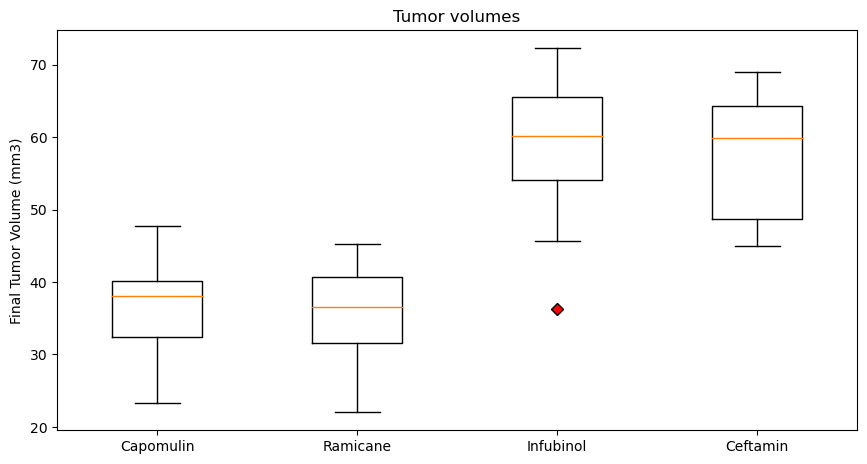

In [18]:
# Generate ###Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens
#Create a list that holds the treatment names
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#using .iloc group the data by the drug regimen for the four drugs.
#identify the max tumor volume for each and use it to plot
capomulin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ceftamin",:]
caft = ceftamin['Tumor Volume (mm3)']
#put the grouped drug regimen data in a single data format for plotting
data = [capo, rami, infu, caft]
 
fig = plt.figure(figsize =(8, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data, labels=treatment_list,flierprops=red_diamond) 
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
 
# show plot
plt.show()

## Line and Scatter Plots

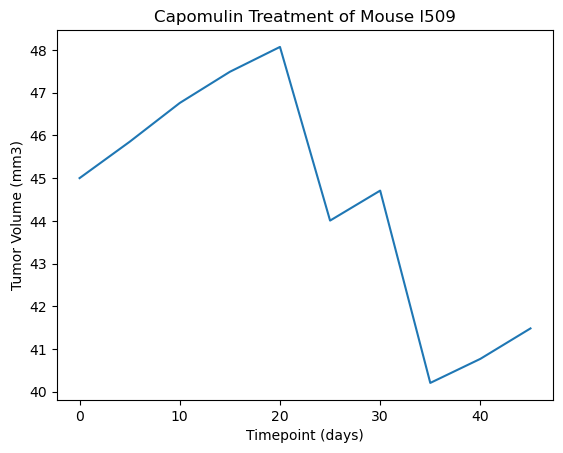

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

C:\Users\btc20\AppData\Local\Temp\ipykernel_25848\3129286607.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average_tumor_volume =average_renamed_df.groupby(['Mouse ID']).mean()


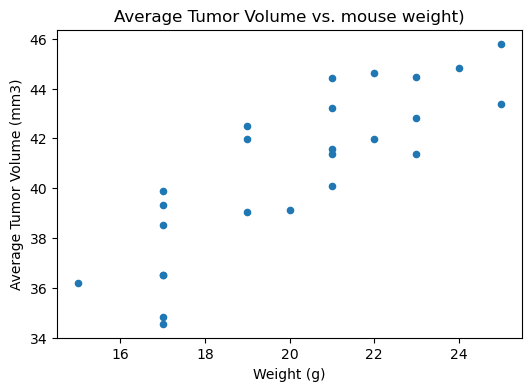

In [20]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

data_capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

average_renamed_df = data_capomulin_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

#with data_capomulin_df created, group the data by Average_tumor_volume 
# Rename the Tumor volume column to average tumor volume
Average_tumor_volume =average_renamed_df.groupby(['Mouse ID']).mean()

Average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4),
                           
              title="Average Tumor Volume vs. mouse weight)"  )
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723


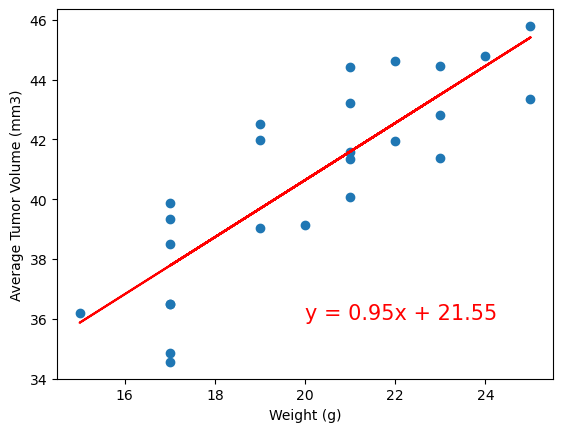

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

average_tumor_volume = Average_tumor_volume.iloc[:,1]
mouse_weight = Average_tumor_volume.iloc[:,4]

correlation = st.pearsonr(mouse_weight,average_tumor_volume)


x_values = Average_tumor_volume['Weight (g)']
y_values = Average_tumor_volume['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.show()